# Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# Data Inspection

In [2]:
train = pd.read_csv("TRAIN (1).csv")
test = pd.read_csv("TEST_FINAL.csv")

In [3]:
train.shape,test.shape

((188340, 10), (22265, 8))

We have 188340 rows and 10 columns in Train set whereas Test set has 22265 rows and 8 columns.

In [4]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
#Order           0.0
Sales            0.0
dtype: float64

In [5]:
#ratio of null values
test.isnull().sum()/train.shape[0] *100

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
dtype: float64

In [6]:
train.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [7]:
test.dtypes

ID               object
Store_id          int64
Store_Type       object
Location_Type    object
Region_Code      object
Date             object
Holiday           int64
Discount         object
dtype: object

# Data Cleaning¶

Why missing values treatment is required? Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [8]:
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [9]:
test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

# Exploratory Data Analysis

In [10]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location_Type', ylabel='count'>

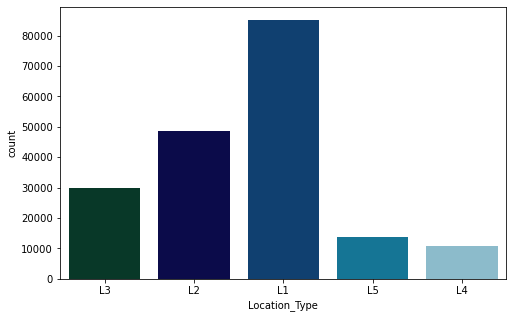

In [11]:
plt.figure(figsize=(8,5))
sns.countplot('Location_Type',data=train,palette='ocean')

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store_Type', ylabel='count'>

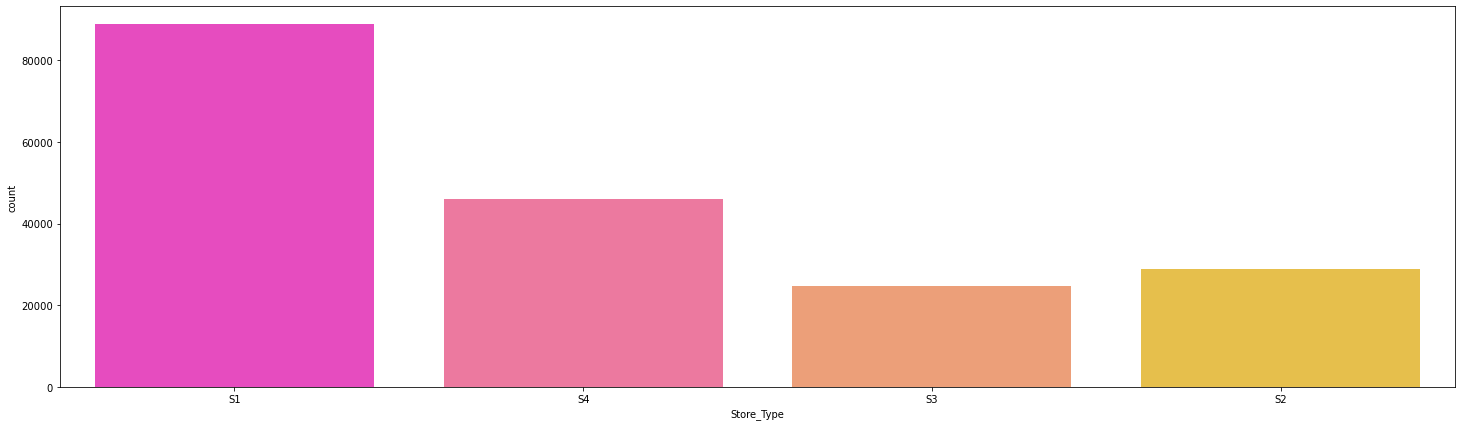

In [12]:
plt.figure(figsize=(25,7))
sns.countplot('Store_Type',data=train,palette='spring')

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region_Code', ylabel='count'>

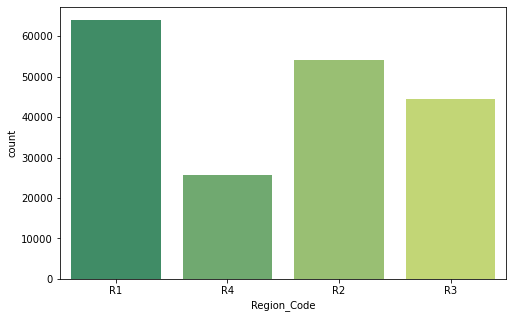

In [13]:
plt.figure(figsize=(8,5))
sns.countplot('Region_Code',data=train,palette='summer')

<AxesSubplot:xlabel='Store_Type', ylabel='Sales'>

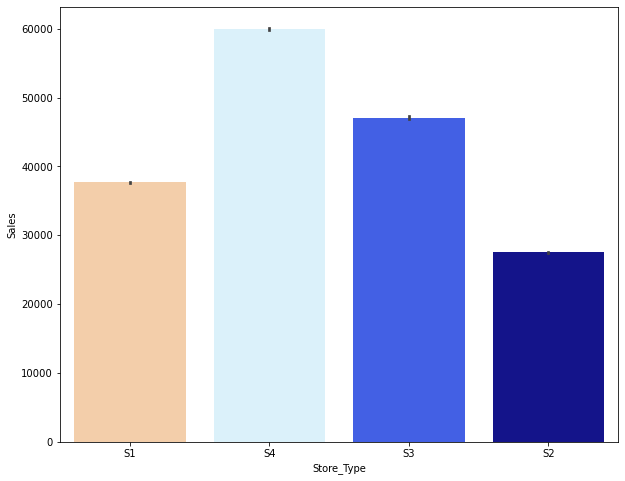

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x='Store_Type',y='Sales',data=train,palette='flag')

<AxesSubplot:xlabel='Location_Type', ylabel='Sales'>

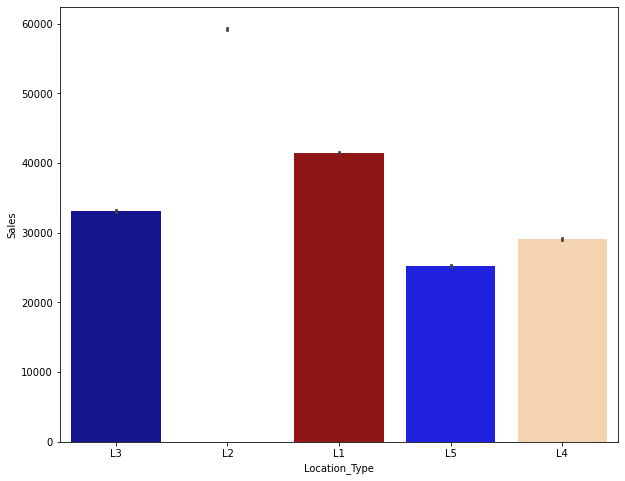

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x='Location_Type',y='Sales',data=train,palette='flag')

# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

Encoding the required columns from training and test dataset

In [17]:
train.dtypes

ID                 int32
Store_id           int64
Store_Type         int32
Location_Type      int32
Region_Code        int32
Date               int32
Holiday            int64
Discount           int32
#Order             int64
Sales            float64
dtype: object

In [18]:
test.dtypes

ID               int32
Store_id         int64
Store_Type       int32
Location_Type    int32
Region_Code      int32
Date             int32
Holiday          int64
Discount         int32
dtype: object

In [19]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,0,1,0,2,0,0,1,1,9,7011.84
1,1,253,3,1,0,0,1,1,60,51789.12
2,2,252,2,1,0,0,1,1,42,36868.20
3,3,251,1,2,0,0,1,1,23,19715.16
4,4,250,1,2,3,0,1,1,62,45614.52


# Building Model

In [20]:
df_train=train.drop('#Order',axis=1)
X=train.iloc[:,0:8].values

In [21]:
df_train.iloc[:,0:8]

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,0,1,0,2,0,0,1,1
1,1,253,3,1,0,0,1,1
2,2,252,2,1,0,0,1,1
3,3,251,1,2,0,0,1,1
4,4,250,1,2,3,0,1,1
...,...,...,...,...,...,...,...,...
188335,188335,149,1,2,1,515,1,1
188336,188336,153,3,1,0,515,1,0
188337,188337,154,0,2,1,515,1,0
188338,188338,155,2,0,1,515,1,1


In [22]:
y=train.iloc[:,-1].values

In [23]:
train.iloc[:,-1]

0          7011.84
1         51789.12
2         36868.20
3         19715.16
4         45614.52
            ...   
188335    37272.00
188336    54572.64
188337    31624.56
188338    49162.41
188339    37977.00
Name: Sales, Length: 188340, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

# Linear regression

In [25]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [26]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)


LinearRegression()

In [27]:
y_pred =  LR.predict(X_test)
y_pred

array([42584.22292601, 40335.3951967 , 34048.31682727, ...,
       53177.2623598 , 25884.06158313, 38126.43669926])

In [28]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, y_pred)

0.13349037637981878

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# KNN

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [30]:
from sklearn import neighbors

In [31]:
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set

In [32]:
mean_squared_log_error(y_test, pred)

0.09170648771735074

# Decision TreeRegressor 
  

In [33]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [34]:
pred=regressor.predict(X_test)

In [35]:
mean_squared_log_error(y_test, pred)

0.08227117425787409

In [37]:
submission = pd.read_csv('SAMPLE.csv')
final_predictions = LR.predict(test)
submission['Sales'] = final_predictions
#only positive predictions for the target variable
submission['Sales'] = submission['Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('submission.csv', index=False)